In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# !pip install --upgrade pandas

In [3]:
src_train = pd.read_csv('GiveMeSomeCredit/cs-training.csv')
src_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

#### CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It starts with business understanding, and then moves to data understanding, data preparation, modelling, evaluation, and deployment. [content from this link](https://www.kaggle.com/code/bannourchaker/credit-part1-dataunderstanding/notebook#Introduction:)
### Understand business goal and columns' meaning.  
#### We are trying to predict 'SeriousDlqin2yrs' (good or bad person) based on other columns.
#### the data dictionary is as the following.

| Variable Name | Description | Type |
| ------ | ------ | ------ |
| SeriousDlqin2yrs | Person experienced 90 days past due delinquency or worse  | Y/N |
| RevolvingUtilizationOfUnsecuredLines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits | percentage |
| age | Age of borrower in years | integer |
| NumberOfTime30-59DaysPastDueNotWorse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years. | integer |
| DebtRatio | Monthly debt payments, alimony,living costs divided by monthy gross income | percentage |
| MonthlyIncome | Monthly income | real |
| NumberOfOpenCreditLinesAndLoans | Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) | integer |
| NumberOfTimes90DaysLate | Number of times borrower has been 90 days or more past due. | integer |
| NumberRealEstateLoansOrLines | Number of mortgage and real estate loans including home equity lines of credit | integer |
| NumberOfTime60-89DaysPastDueNotWorse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years. | integer |
| NumberOfDependents | Number of dependents in family excluding themselves (spouse, children etc.) | integer |

### Understanding some columns.
```
RevolvingUtilizationOfUnsecuredLines:  Your `credit card balance` is the total amount of money you owe your credit card company (should be of some time period); Personal lines of credit (PLOC): a set amount of money from which you can borrow (up to the limit) for a given period of time. 中文为可用额度比值，可用额度除以信用额度。这里的 credit card balance 应该是上期多还的金额。上期多还的加上信用额度等于本期借的钱、欠的钱加上可以借的钱 (PLOC).所以这个值一般应该小于1，后面会看到有很大的数字（五位数），如果上期多还金额很多，可能会这样，可能还有别的可能性，或者需要剔除大于1的值。这个值一般越高我们越愿意借给他钱，即更有可能预测为“好人”(SeriousDlqin2yrs Y).
```

In [55]:
# Unamed column rep. for index #, which we can delete.
src_train.drop(columns=["Unnamed: 0"], inplace=True)
src_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


## EDA

### [this page gives a nice way to reduce memory usage of dataframes.](https://www.kaggle.com/code/gemartin/load-data-reduce-memory-usage/notebook)(specify the exact dtype of each column, such as int8,16 ,32 ,e.t.c.)

In [14]:
###############################################################################
#                         Reduce Memory                                       #
###############################################################################

# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
src_train= reduce_mem_usage(src_train)

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%


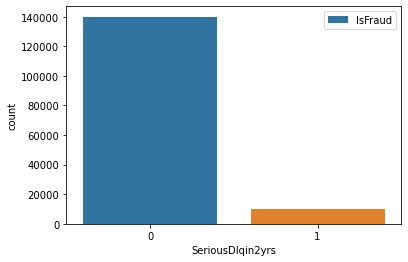

In [15]:
sns.countplot(x='SeriousDlqin2yrs',data=src_train, label='IsFraud')
plt.legend()

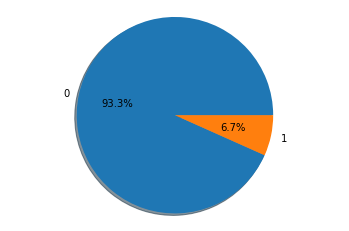

In [16]:
# https://www.kaggle.com/code/bannourchaker/credit-part1-dataunderstanding/notebook#Reduce-Memory:
labels = src_train['SeriousDlqin2yrs'].astype('category').cat.categories.tolist()
counts = src_train['SeriousDlqin2yrs'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

### target column is very unbalanced. This may cause serious problems and solutions might be found [here](https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0#ac47) or [here](https://medium.com/thecyphy/handling-imbalanced-datasets-with-imblearn-library-df5e58b968f4). Basically, we can cut data from cat. contains more data (usually not recommended b/c we lose a lot of information.), or add data from cat. contains less data based on some criterias. The latter method can be achieve using python package imblearn.make_imbalance or imblearn.ensemble.BalancedRandomForestClassifier.

### <span style="color:blue">**missing values.**</span>
#### [some methods](https://www.kaggle.com/code/dansbecker/handling-missing-values/notebook) to deal with missing values. As showing below, since in this case about 20% percent of mot_income is missed, we shouldn't drop this column or NAN rows, imputation should be done here. Take the average value might be a good choice here. Just keep in mind that we have some advanced tech.s here such as predicting values using decision trees or [Xgboost](https://xgboost.readthedocs.io/en/latest/python/python_api.html). However, that may not bring a better result.

<AxesSubplot:>

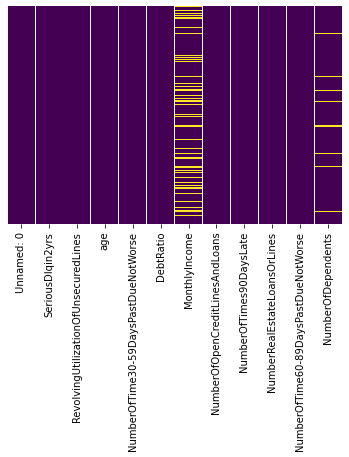

In [17]:
sns.heatmap(src_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
# summarize the number of rows with missing values for each column
for i in range(src_train.shape[1]):
    # count number of rows with missing values
    n_miss = src_train.iloc[:,i].isnull().sum()
    perc = n_miss / src_train.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 29731 (19.8%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 3924 (2.6%)


#### impute missing values with their average value.

In [33]:
src_train_mdf = src_train.copy()
src_train_mdf['MonthlyIncome'] = src_train_mdf['MonthlyIncome'].apply(lambda x: src_train_mdf['MonthlyIncome'].mean() if pd.isna(x) else x)
src_train_mdf['NumberOfDependents'] = src_train_mdf['NumberOfDependents'].apply(lambda x: int(x) if not pd.isna(x) else x)
src_train_mdf['NumberOfDependents'] = src_train_mdf['NumberOfDependents'].apply(lambda x: round(src_train_mdf['NumberOfDependents'].mean()) if pd.isna(x) else x)

In [35]:
src_train_mdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,NaN,NaN,0.0,0.029861,0.154175,0.559082,50720.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,352.825867,2038.782471,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,150000.0,6670.180774,12880.445756,0.0,3903.000000,6600.000000,7400.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


#### values seem to be in a relative resonable range except for RUOUL, DebtRatio and Mth_income. Let us figure these out.

Text(0.5, 1.0, 'Distribution of RevolvingUtilizationOfUnsecuredLines')

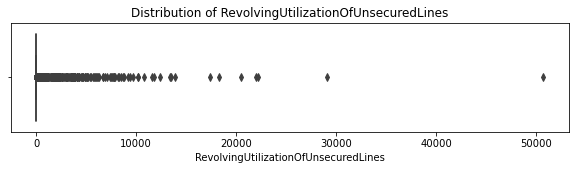

In [36]:
plt.figure(figsize=(10,2))
sns.boxplot(data=src_train_mdf, x='RevolvingUtilizationOfUnsecuredLines')
plt.title("Distribution of RevolvingUtilizationOfUnsecuredLines")

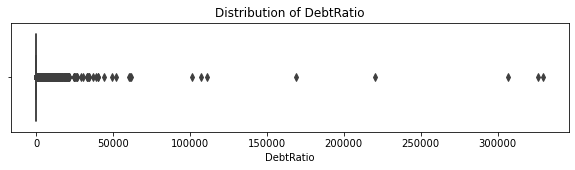

In [37]:
plt.figure(figsize=(10,2))
sns.boxplot(data=src_train_mdf, x='DebtRatio')
plt.title("Distribution of DebtRatio")

Text(0.5, 1.0, 'Distribution of MonthlyIncome')

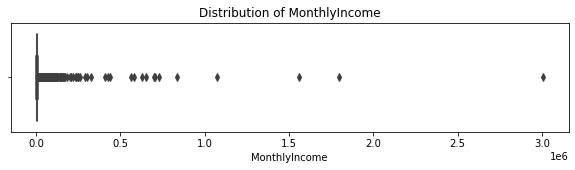

In [38]:
plt.figure(figsize=(10,2))
sns.boxplot(data=src_train_mdf, x='MonthlyIncome')
plt.title("Distribution of MonthlyIncome")

#### [to deal with outliers and skewed data](https://www.indeed.com/career-advice/career-development/skewed-data). Basically we apply log (or other methods) func.s to make features into some distribution, which can improve the performance of our model.

## [Outlier Identification](https://www.kaggle.com/code/bannourchaker/credit-part1-dataunderstanding/notebook#Convert-Dtypes-:)
### Skewness :
#### Skewness is computed for each row or each column of the data present in the DataFrame object.

#### Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

### Important Notes:

· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed

In [39]:
skew = src_train_mdf.skew().sort_values(ascending =False )
skew_df= pd.DataFrame({'skew':skew})
skew_df.head(10)

C:\Users\U1082524\Anaconda3\lib\site-packages\pandas\core\nanops.py:1205: RuntimeWarning: overflow encountered in square
  adjusted2 = adjusted**2
C:\Users\U1082524\Anaconda3\lib\site-packages\pandas\core\nanops.py:1206: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted


,skew
MonthlyIncome,127.357979
DebtRatio,95.157791
NumberOfTime60-89DaysPastDueNotWorse,23.331743
NumberOfTimes90DaysLate,23.087345
NumberOfTime30-59DaysPastDueNotWorse,22.597108
NumberRealEstateLoansOrLines,3.482484
SeriousDlqin2yrs,3.468857
NumberOfDependents,1.589420
NumberOfOpenCreditLinesAndLoans,1.215314
age,0.188995


C:\Users\U1082524\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


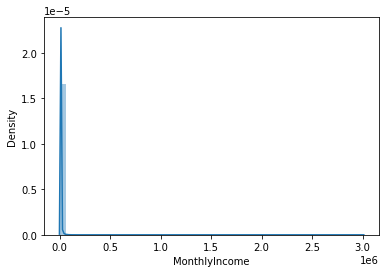

In [41]:
ax = sns.distplot(src_train_mdf['MonthlyIncome'])

In [40]:
amount_corrected= np.log(src_train_mdf['MonthlyIncome' ]+1)

print(src_train_mdf['MonthlyIncome'].skew())

print(amount_corrected.skew())

127.35797862582434
-4.938354604025628


C:\Users\U1082524\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


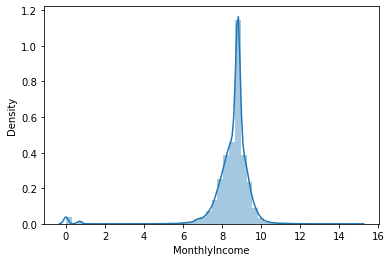

In [42]:
ax = sns.distplot(amount_corrected)

In [43]:
src_train_mdf['MonthlyIncome'] = amount_corrected

In [44]:
amount_corrected_debtr = np.log(src_train_mdf['DebtRatio' ]+1)

print(src_train_mdf['DebtRatio'].skew())

print(amount_corrected_debtr.skew())

95.15779
1.7490132


C:\Users\U1082524\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


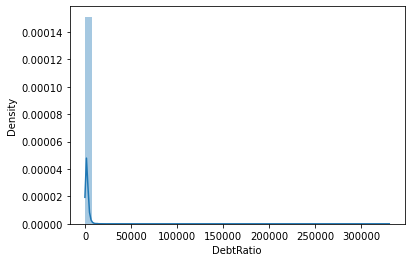

In [45]:
ax = sns.distplot(src_train_mdf['DebtRatio'])

C:\Users\U1082524\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


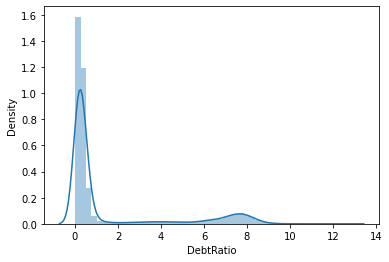

In [46]:
ax = sns.distplot(amount_corrected_debtr)

In [47]:
src_train_mdf['DebtRatio'] = amount_corrected_debtr

C:\Users\U1082524\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


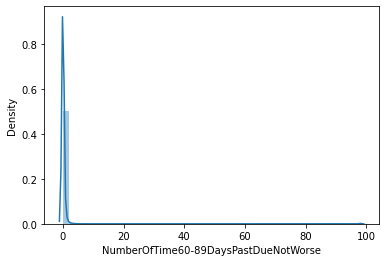

In [50]:
ax = sns.distplot(src_train_mdf['NumberOfTime60-89DaysPastDueNotWorse'])

In [51]:
src_train_mdf['NumberOfTime60-89DaysPastDueNotWorse' ].describe().T

count    150000.000000
mean          0.240387
std           4.155179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

In [58]:
amount_corrected_pastd = np.log(src_train_mdf['NumberOfTime60-89DaysPastDueNotWorse' ] + 1)

print(src_train_mdf['NumberOfTime60-89DaysPastDueNotWorse'].skew())

print(amount_corrected_pastd.skew())

23.33174311951399
nan


In [59]:
amount_corrected_pastd.describe().T

count    150000.000000
mean          0.047729
std           0.265137
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.593750
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

C:\Users\U1082524\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


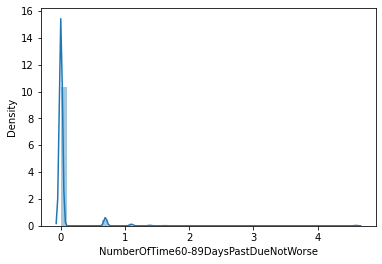

In [60]:
ax = sns.distplot(amount_corrected_pastd)

In [48]:
# Convert Dtypes :
src_train_mdf[src_train_mdf.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = src_train_mdf[src_train_mdf.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
src_train_mdf[src_train_mdf.select_dtypes(['object','category']).columns] = src_train_mdf.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

<AxesSubplot:>

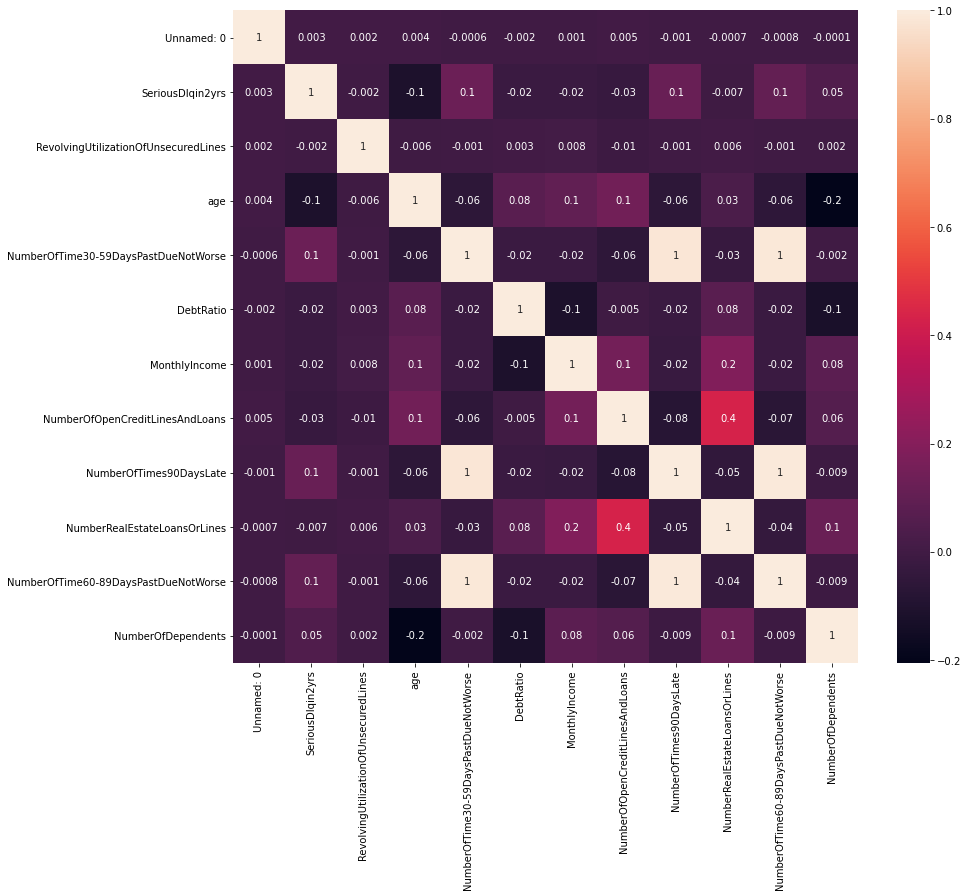

In [61]:
plt.figure(figsize=(14,12))
sns.heatmap(src_train_mdf.corr(), fmt='0.01g', annot=True)

In [62]:
src_train_mdf.corr()['SeriousDlqin2yrs'].sort_values()

age                                    -0.115386
NumberOfOpenCreditLinesAndLoans        -0.029669
MonthlyIncome                          -0.018989
DebtRatio                              -0.017194
NumberRealEstateLoansOrLines           -0.007038
RevolvingUtilizationOfUnsecuredLines   -0.001801
Unnamed: 0                              0.002801
NumberOfDependents                      0.045103
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfTimes90DaysLate                 0.117175
NumberOfTime30-59DaysPastDueNotWorse    0.125587
SeriousDlqin2yrs                        1.000000
Name: SeriousDlqin2yrs, dtype: float64

### columns 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse' are highly correlated, choose column 'NumberOfTime30-59DaysPastDueNotWorse' based on corr. table above

In [63]:
src_train_mdf = src_train_mdf.drop(columns=['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'])

In [65]:
cat_columns = src_train_mdf.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
num_columns = src_train_mdf.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns

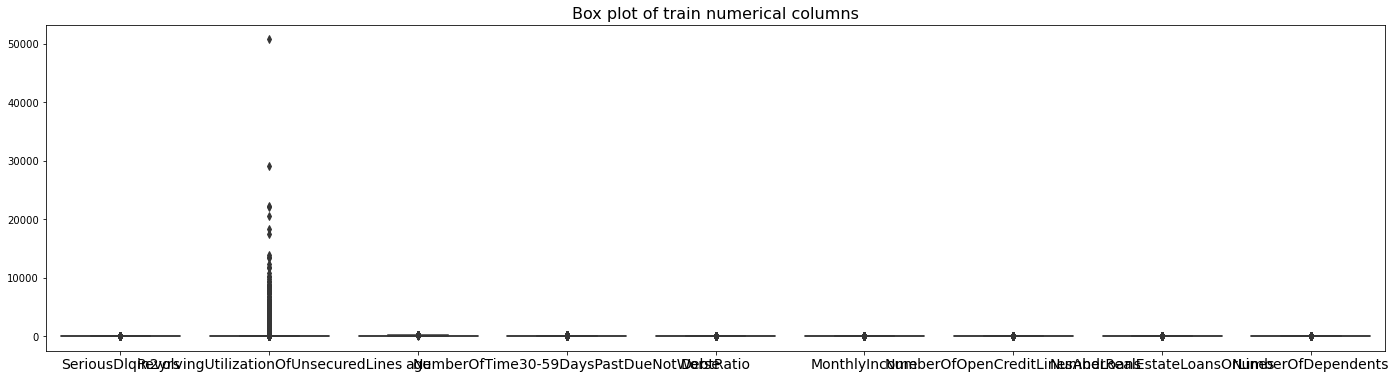

In [66]:
v0 = sns.color_palette(palette='viridis').as_hex()[0]
fig = plt.figure(figsize=(24,6))
sns.boxplot(data=src_train_mdf[num_columns], color=v0,saturation=.5);
plt.xticks(fontsize= 14)
plt.title('Box plot of train numerical columns', fontsize=16);

In [69]:
X_train = src_train_mdf.drop(columns=['SeriousDlqin2yrs', 'Unnamed: 0'])
y_train = src_train_mdf['SeriousDlqin2yrs']

In [70]:
from sklearn.linear_model import LogisticRegression

In [72]:
src_test = pd.read_csv('GiveMeSomeCredit/cs-test.csv')
src_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [73]:
X_test = src_test.drop(columns=['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'SeriousDlqin2yrs', 'Unnamed: 0'])
# y_test = src_test['SeriousDlqin2yrs']

In [74]:
sample_entry = pd.read_csv('GiveMeSomeCredit/sampleEntry.csv')
y_test = sample_entry['Probability'].to_frame()
# change prob. column to binary column.
y_test['Probability'] = y_test['Probability'].apply(lambda x: x*2 // 1)

In [75]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\U1082524\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
X_test.loc[pd.isna(X_test['MonthlyIncome']), 'MonthlyIncome'] = X_test['MonthlyIncome'].mean()
X_test.loc[pd.isna(X_test['NumberOfDependents']), 'NumberOfDependents'] = X_test['NumberOfDependents'].mean()
predictions = logmodel.predict(X_test)

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     99798
         1.0       0.00      0.00      0.00      1705

    accuracy                           0.98    101503
   macro avg       0.49      0.50      0.50    101503
weighted avg       0.97      0.98      0.97    101503



## Evaluation
### Model accuracy scoring
#### The easiest way to analyze performance is with accuracy. It measures how many observations, both positive and negative, were correctly classified.

#### You shouldn’t use accuracy on imbalanced problems. Then, it is easy to get a high accuracy score by simply classifying all observations as the majority class. For example in our case, by classifying all transactions as non-fraudulent we can get an accuracy of over 0.9.

<img src='GiveMeSomeCredit/confusion_matrix.JPG' /></a>